# Подготовка данных

```
IDAO 2021
│
└───train
│   │   NR
│   │   │  0.125__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run4_ev757;1.png
│   │   │  ...
│   │
│   └───ER
│       │  0.77978515625__CYGNO_60_40_ER_3_keV_930V_30cm_IDAO_iso_crop_hist_pic_run5_ev863;1.png
│       │  ...
│
└───private test
│   │  000eb12def5371089743dcfe401a8e399f5883fc.png
│   │  ...
│
└───public test
    │  00cb5b91a4acdfaa2f55dc2266e598ff06f9209e.png
    │  ...
```

In [1]:
import os
import pandas as pd
import numpy as np

### Тренировочный датасет

Тренировочный датасет содержит все метки в названии, нас интересует только значение энергии в __кэВ__ и класс частицы (__NR__ или __ER__).

In [3]:
files_er = os.listdir(PATCH_ER)
files_nr = os.listdir(PATCH_NR)

In [4]:
files_er = np.array([x.split('_') + [os.path.join(PATCH_ER, x)] for x in files_er])
files_nr = np.array([x.split('_') + [os.path.join(PATCH_NR, x)] for x in files_nr])

In [5]:
files_er = np.delete(files_er, [1], axis=1)
files_nr = np.delete(files_nr, [1, 5, 11], axis=1)

In [6]:
train = pd.DataFrame(np.concatenate((files_er, files_nr)))

In [7]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404,13404
unique,13030,1,1,1,2,6,1,1,1,1,1,1,1,1,5,919,13404
top,-1.6927000284194946,CYGNO,60,40,ER,10,keV,930V,30cm,IDAO,iso,crop,hist,pic,run5,ev908;1.png,C:\Users\Кириши\Desktop\IDAO 2021\idao_final\t...
freq,4,13404,13404,13404,6758,2274,13404,13404,13404,13404,13404,13404,13404,13404,2685,24,1


In [8]:
train = train.loc[:, [16, 4, 5]]
train.columns = ('f_name', 'classification', 'regression')

In [9]:
train.head(2)

,f_name,classification,regression
0,C:\Users\Кириши\Desktop\IDAO 2021\idao_final\t...,ER,30
1,C:\Users\Кириши\Desktop\IDAO 2021\idao_final\t...,ER,3


### Тестовый датасет

Также как и с тренировочным датасетом создадим таблицу ссылок.

In [12]:
files_private = os.listdir(PATCH_PRIVATE)
files_public = os.listdir(PATCH_PUBLIC)

In [13]:
files_private = pd.DataFrame([[x[:-4], os.path.join(PATCH_PRIVATE, x)] for x in files_private], columns=['id', 'f_name'])
files_private['kind'] = 'private'

files_public = pd.DataFrame([[x[:-4], os.path.join(PATCH_PUBLIC, x)] for x in files_public], columns=['id', 'f_name'])
files_public['kind'] = 'public'

In [14]:
test = pd.concat((files_private, files_public)).sort_values('id', ignore_index=True)

In [15]:
test.head(2)

,id,f_name,kind
0,00013a94f1fae3e5a33f8b44c2842c85f0483e96,C:\Users\Кириши\Desktop\IDAO 2021\idao_final\p...,private
1,0005564c011259402dcb6e3beb6e64d285124fa0,C:\Users\Кириши\Desktop\IDAO 2021\idao_final\p...,private


### Просмотр данных

Class: ER   Energy: 30


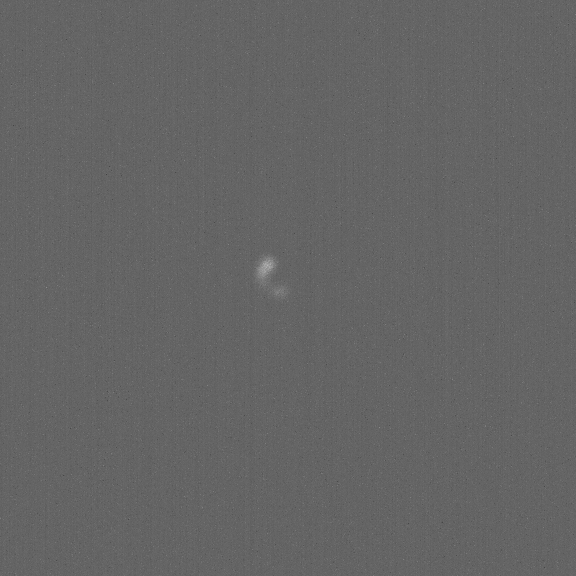

In [18]:
from PIL import Image
idx = 0
print('Class: {}   Energy: {}'.format(train.classification[idx], train.regression[idx]))
Image.open(train.f_name[idx])

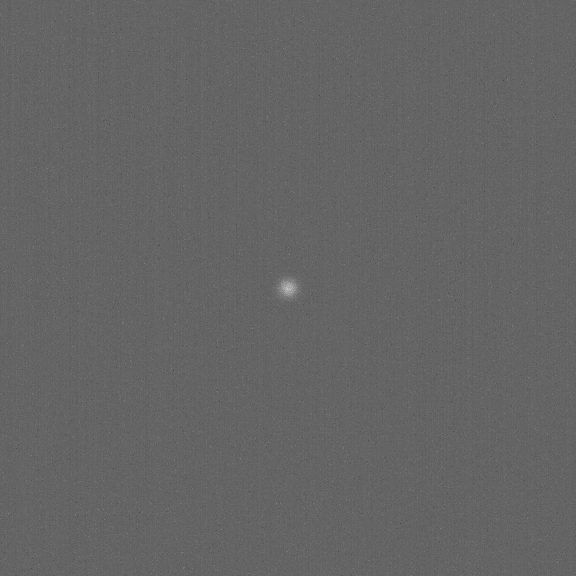

In [19]:
Image.open(test.f_name[28])